Zadanie 1 Wczytanie danych do jednego pandas dataframe

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data_path = './data'
dataframes = []

for filename in os.listdir(data_path):
    if filename.endswith(".txt"):
        year = int(filename[3:7])
        file_path = os.path.join(data_path, filename)

        df = pd.read_csv(file_path, header=None, names=["Name", "Sex", "Count"])
        df['Year'] = year
        dataframes.append(df)
all_data = pd.concat(dataframes, ignore_index=True)
all_data

,Name,Sex,Count,Year
0,Mary,F,63254,1942
1,Barbara,F,44736,1942
2,Patricia,F,39461,1942
3,Linda,F,31611,1942
4,Carol,F,30271,1942
...,...,...,...,...
2085153,Ysmael,M,5,1945
2085154,Zacarias,M,5,1945
2085155,Zach,M,5,1945
2085156,Zachariah,M,5,1945


Zadanie 2 Ile unikalnych imion zostalo nadanych w tym czasie

In [4]:
unique_names_count = all_data['Name'].nunique()
print(f"Liczba unikalnych imion w calym zbiorze: {unique_names_count}")

Liczba unikalnych imion w calym zbiorze: 102449


Zadanie 3 Ile unikalnych imion zostało nadanych rozróżniając płeć żeńską i męską

In [5]:
unique_names_by_sex = all_data.groupby(['Sex', 'Name'])['Name'].nunique()
unique_names_by_sex_count = unique_names_by_sex.groupby('Sex').sum()
print(f"Liczba unikalnych imion  F: {unique_names_by_sex_count['F']}, Liczba unikalnych imion M: {unique_names_by_sex_count['M']}")

Liczba unikalnych imion  F: 70227, Liczba unikalnych imion M: 43655


Zadanie 4 Stwórz nowe kolumny frequency_male i frequency_female i określ popularność każdego z imion w danym każdym roku dzieląc liczbę razy, kiedy imię zostało nadane przez całkowita liczbę urodzeń dla danej płci.

In [6]:
# Suma urodzeń dla każdego roku i płci 
all_data['Total_birth'] = all_data.groupby(['Year', 'Sex'])['Count'].transform('sum')
all_data['Frequency_appearance'] = all_data['Count']/all_data['Total_birth']

result_data = all_data.pivot(index=['Year', 'Name'], columns='Sex', values='Frequency_appearance').fillna(0).reset_index()
result_data.rename(columns={"F" : "frequency_female", "M" : "frequency_male"}, inplace=True)
result_data

Sex,Year,Name,frequency_female,frequency_male
0,1880,Aaron,0.000000,0.000923
1,1880,Ab,0.000000,0.000045
2,1880,Abbie,0.000780,0.000000
3,1880,Abbott,0.000000,0.000045
4,1880,Abby,0.000066,0.000000
...,...,...,...,...
1903285,2022,Zyrie,0.000000,0.000006
1903286,2022,Zyrin,0.000000,0.000003
1903287,2022,Zyron,0.000000,0.000007
1903288,2022,Zyrus,0.000000,0.000005


Zadanie 5 Określ i wyświetl wykres złożony z dwóch podwykresów, gdzie osią x jest skala czasu, a oś y reprezentuje: liczbę urodzin w danym roku (wykres na górze), stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku(wykres na dole) W którym roku zanotowano najmniejszą, a w którym największą różnicę w liczbie urodzeń między chłopcami a dziewczynkami (pytanie dotyczy podwykresu przedstawiającego stosunek liczby urodzin)? Odpowiedź wyznacz i wyświetl na ekranie

In [7]:
# Sum of births per year (all female + male results) - liczba urodzin w danym roku (wykres na górze)
all_data['Total_birth_fm'] = all_data.groupby(['Year'])['Count'].transform('sum')
total_births_per_year = all_data[['Year', 'Total_birth_fm']].groupby(['Year'], as_index=False).mean()
total_births_per_year

,Year,Total_birth_fm
0,1880,201484.0
1,1881,192690.0
2,1882,221533.0
3,1883,216945.0
4,1884,243461.0
...,...,...
138,2018,3511750.0
139,2019,3465821.0
140,2020,3333981.0
141,2021,3379713.0


In [8]:
# stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku (wykres na dole)
births_per_year_female_male = all_data.pivot(index=['Year', 'Name'], columns='Sex', values='Count').fillna(0).reset_index()
births_per_year_female_male_sum = births_per_year_female_male[['Year', 'F', 'M']].groupby(['Year'], as_index=False).sum()
births_per_year_female_male_sum['Ratio'] = births_per_year_female_male_sum['F']/births_per_year_female_male_sum['M']

# Najmniejsza i największa różnica między chłopcami a dziewczynkami
min_diff_year = births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Ratio'].idxmin()]['Year']
max_diff_year = births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Ratio'].idxmax()]['Year']
print(f"Rok z min różnicą girls - boys births: {min_diff_year}, rok z max różnicą: {max_diff_year}")

Rok z min różnicą girls - boys births: 1880.0, rok z max różnicą: 1901.0


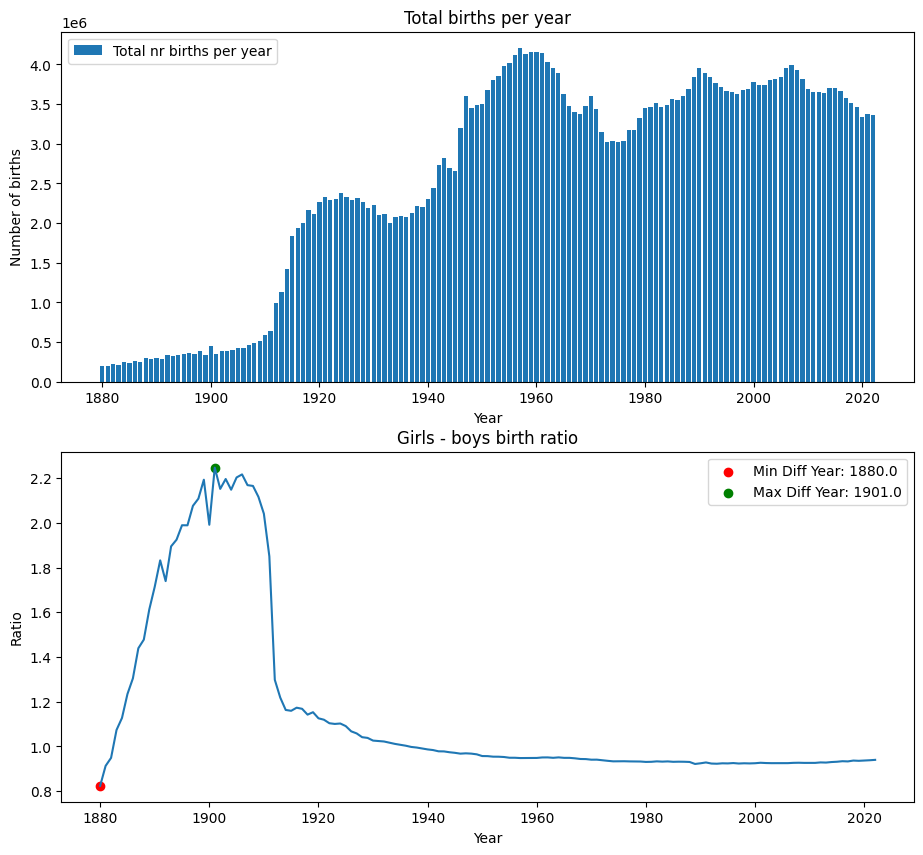

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey = False, figsize=(11, 10))

axes[0].bar(total_births_per_year['Year'], total_births_per_year['Total_birth_fm'])
axes[0].set_ylabel('Number of births')
axes[0].set_xlabel('Year')
axes[0].legend(['Total nr births per year'], loc='upper left')
axes[0].set_title('Total births per year')

axes[1].plot(births_per_year_female_male_sum['Year'], births_per_year_female_male_sum['Ratio'])
axes[1].set_ylabel('Ratio')
axes[1].set_xlabel('Year')
axes[1].set_title('Girls - boys birth ratio')

# Zaznaczenie min_diff i max_diff
axes[1].scatter(min_diff_year, births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Year'] == min_diff_year]['Ratio'].values[0],
               color='red', marker='o', label=f'Min Diff Year: {min_diff_year}')
axes[1].scatter(max_diff_year, births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Year'] == max_diff_year]['Ratio'].values[0],
               color='green', marker='o', label=f'Max Diff Year: {max_diff_year}')
axes[1].legend()

Zadanie 6 Wyznacz 1000 najpopularniejszych imion dla każdej płci w całym zakresie czasowym

In [10]:
# Dla każdego imienia kumulacyjna suma wartości frequency - jako najpopularniejsze należy uznać imiona, które najdłużej zajmowały wysokie miejsce na liście rankingowej
result_data_test = all_data.groupby(['Year', 'Name', 'Sex'])['Frequency_appearance'].sum().unstack(fill_value=0).reset_index()

top_names_per_year_sex = all_data.groupby(['Year', 'Sex', 'Name'])['Frequency_appearance'].sum().reset_index()
# Year - ascending, Sex - ascending, Frequency - descending 
top_names_per_year_sex = top_names_per_year_sex.sort_values(by=['Year', 'Sex', 'Frequency_appearance'], ascending=[True, True, False])
top_names_per_year_sex['Rank'] = top_names_per_year_sex.groupby(['Year', 'Sex']).cumcount() + 1


top1000_ranking = top_names_per_year_sex[top_names_per_year_sex['Rank'] <= 1000].groupby(['Sex', 'Name'])['Frequency_appearance'].sum().reset_index()
top1000_ranking = top1000_ranking.sort_values(by=['Sex', 'Frequency_appearance'], ascending=[True, False])
top1000_ranking['Rank'] = top1000_ranking.groupby('Sex').cumcount() + 1

print("Top 1000 imion dla płci żeńskiej:")
print(top1000_ranking[top1000_ranking['Sex'] == 'F'].head(1000))

print("\nTop 1000 imion dla płci męskiej:")
print(top1000_ranking[top1000_ranking['Sex'] == 'M'].head(1000))



Top 1000 imion dla płci żeńskiej:
     Sex       Name  Frequency_appearance  Rank
2936   F       Mary              4.749131     1
1281   F  Elizabeth              1.543251     2
2845   F   Margaret              1.443219     3
274    F       Anna              1.304498     4
1705   F      Helen              1.299765     5
...   ..        ...                   ...   ...
1961   F    Jenifer              0.014003   996
2718   F        Luz              0.014000   997
73     F      Aisha              0.013998   998
1790   F       Iola              0.013956   999
176    F     Althea              0.013951  1000

[1000 rows x 4 columns]

Top 1000 imion dla płci męskiej:
     Sex     Name  Frequency_appearance  Rank
6310   M     John              5.631279     1
6158   M    James              4.876026     2
7945   M  William              4.745829     3
7384   M   Robert              4.008427     4
4986   M  Charles              2.690533     5
...   ..      ...                   ...   ...
5378   M 

Zadanie 7 Wyświetl na jednym wykresie zmiany dla imienia męskiego John i pierwszego imienia żeńskiego rankingu top-1000 (zaopatrz wykres w odpowiednią legendę):
    na osi Y po lewej liczbę razy kiedy imę zostało nadane w każdym roku (wyświetl ile razy nadano to imię w 1934, 1980 i 2022r)?
    na osi Y po prawej popularność tych imion w każdym z tych lat


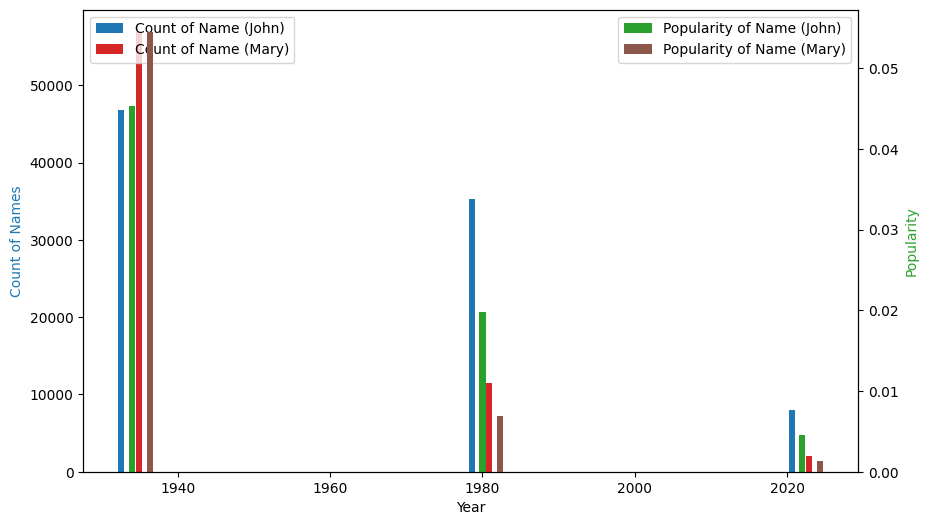

In [11]:
years_to_plot = [1934, 1980, 2022]

# John count 
john_count = all_data[(all_data['Name'] == 'John')& (all_data['Year'].apply(lambda x: x in years_to_plot))]

# First female name count
first_female_name = top1000_ranking[top1000_ranking['Sex'] == 'F'].head(1)['Name'].values[0]
first_female_name_count = all_data[(all_data['Name'] == first_female_name) & (all_data['Year'].apply(lambda x: x in years_to_plot))]


fig, ax = plt.subplots(figsize=(10, 6))
# Lewa strona tj. count
bar_width = 0.5
bar_gap = 0.9
bar_positions_john = john_count['Year'] - bar_width - bar_gap
bar_positions_female = first_female_name_count['Year'] + bar_gap

ax.set_xlabel('Year')
ax.set_ylabel('Count of Names', color='tab:blue')
ax.bar(bar_positions_john, john_count['Count'], color='tab:blue', label='Count of Name (John)')
ax.bar(bar_positions_female, first_female_name_count['Count'], color='tab:red', label=f'Count of Name ({first_female_name})')
ax.tick_params(axis='y')
ax.legend(loc='upper left')

bar_positions_john_popularity = bar_positions_john + bar_width + bar_gap
bar_positions_female_popularity = bar_positions_female + bar_width + bar_gap

ax2 = ax.twinx()
ax2.set_ylabel('Popularity', color='tab:green')
ax2.bar(bar_positions_john_popularity, john_count['Frequency_appearance'], color='tab:green', label='Popularity of Name (John)')
ax2.bar(bar_positions_female_popularity, first_female_name_count['Frequency_appearance'], color='tab:brown', label=f'Popularity of Name ({first_female_name})')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')




Zadanie 8 Wykreśl wykres z podziałem na lata i płeć zawierający informację jaki procent w danym roku stanowiły imiona należące do rankingu top1000 (wyznaczonego dla całego zbioru (pkt 6)). Wykres ten opisuje różnorodność imion, wyświetl rok, w którym zaobserwowano największą różnicę w różnorodności między imionami męskimi a żeńskimi .

Największa różnica w różnorodności między imionami męskimi a żeńskimi występuje w roku 1901 z różnicą wynoszącą 27.53%.


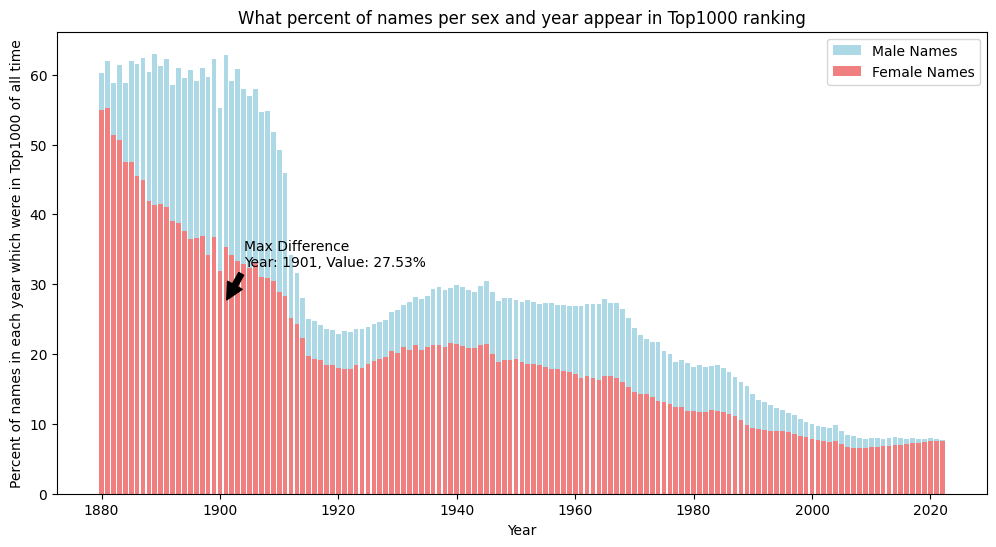

Year
1880     5.324712
1881     6.723911
1882     7.418842
1883    10.792174
1884    11.404171
          ...    
2018     0.545485
2019     0.473029
2020     0.420990
2021     0.308832
2022     0.195672
Name: IsInTop1000_percent, Length: 143, dtype: float64

In [12]:
top1000_men = top1000_ranking[top1000_ranking['Sex'] == 'M'].head(1000)['Name'].tolist()
top1000_female = top1000_ranking[top1000_ranking['Sex'] == 'F'].head(1000)['Name'].tolist()
top1000_male_female = top1000_men + top1000_female
# Czy dane imie w konkretnym roku należy do rankingu top 1000 dla całego przedziału czasowego
all_data['IsInTop1000'] = all_data['Name'].isin(top1000_male_female)
unique_names_count_per_sex_year = all_data.groupby(['Year', 'Sex'])['IsInTop1000'].mean().reset_index()
unique_names_count_per_sex_year['IsInTop1000_percent'] = unique_names_count_per_sex_year['IsInTop1000'] * 100

# Najwieksza roznica w roznorodnosci miedzy imionami meskimi a zenskimi 
unique_names_count_per_sex_year_male = unique_names_count_per_sex_year[unique_names_count_per_sex_year['Sex'] == 'M']
unique_names_count_per_sex_year_female = unique_names_count_per_sex_year[unique_names_count_per_sex_year['Sex'] == 'F']
diff_percent = unique_names_count_per_sex_year_male.set_index('Year')['IsInTop1000_percent'] - unique_names_count_per_sex_year_female.set_index('Year')['IsInTop1000_percent']
max_diff_year_diversity = diff_percent.idxmax()
max_diff_value_diversity = diff_percent.max()

print(f"Największa różnica w różnorodności między imionami męskimi a żeńskimi występuje w roku {max_diff_year_diversity} z różnicą wynoszącą {max_diff_value_diversity:.2f}%.")

# Wykres
fig, ax = plt.subplots(figsize=(12, 6))

# Wykres dla imion męskich
ax.bar(unique_names_count_per_sex_year[unique_names_count_per_sex_year['Sex'] == 'M']['Year'], unique_names_count_per_sex_year[unique_names_count_per_sex_year['Sex'] == 'M']['IsInTop1000_percent'], label='Male Names', color='lightblue')
ax.bar(unique_names_count_per_sex_year[unique_names_count_per_sex_year['Sex'] == 'F']['Year'], unique_names_count_per_sex_year[unique_names_count_per_sex_year['Sex'] == 'F']['IsInTop1000_percent'], label='Female Names', color='lightcoral')

ax.annotate(f'Max Difference\nYear: {max_diff_year_diversity}, Value: {max_diff_value_diversity:.2f}%', xy=(max_diff_year_diversity, max_diff_value_diversity), xytext=(max_diff_year_diversity + 3, max_diff_value_diversity + 5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlabel('Year')
ax.set_ylabel('Percent of names in each year which were in Top1000 of all time')
ax.legend()
ax.set_title('What percent of names per sex and year appear in Top1000 ranking')
plt.show()

diff_percent


Zadanie 9 Zweryfikuj hipotezę czy prawdą jest, że w obserwowanym okresie rozkład ostatnich liter imion męskich uległ istotnej zmianie? 

a) dokonaj agregacji wszystkich urodzeń w pełnym zbiorze danych z podziałem na rok i płeć i ostatnią literę,

In [13]:
# Dodanie kolumny Last_letter
all_data['Last_letter'] = all_data['Name'].apply(lambda x: x[-1])
all_data

# Agregacja danych
letter_popularity = all_data.groupby(['Year', 'Sex', 'Last_letter'])['Count'].sum().reset_index()

# Wyodrebnienie lat do sprawdzenia 
years_to_compare = [1917, 1967, 2022]
selected_years_data = letter_popularity[letter_popularity['Year'].isin(years_to_compare)].copy()

selected_years_data['Total_births'] = selected_years_data.groupby(['Year', 'Sex'])['Count'].transform('sum')
selected_years_data['Normalized_popularity'] = selected_years_data['Count'] / selected_years_data['Total_births']
selected_years_data

,Year,Sex,Last_letter,Count,Total_births,Normalized_popularity
1571,1917,F,a,279764,1081268,0.258737
1572,1917,F,b,11,1081268,0.000010
1573,1917,F,d,19939,1081268,0.018440
1574,1917,F,e,335968,1081268,0.310717
1575,1917,F,g,198,1081268,0.000183
...,...,...,...,...,...,...
6784,2022,M,v,3164,1733166,0.001826
6785,2022,M,w,15576,1733166,0.008987
6786,2022,M,x,21241,1733166,0.012256
6787,2022,M,y,82316,1733166,0.047495


c) wyświetl dane popularności litery dla mężczyzn w postaci wykresu słupkowego zawierającego poszczególne lata i gdzie słupki grupowane są wg litery. Wyświetl, dla której litery wystąpił największy wzrost/spadek między rokiem 1917 a 2022

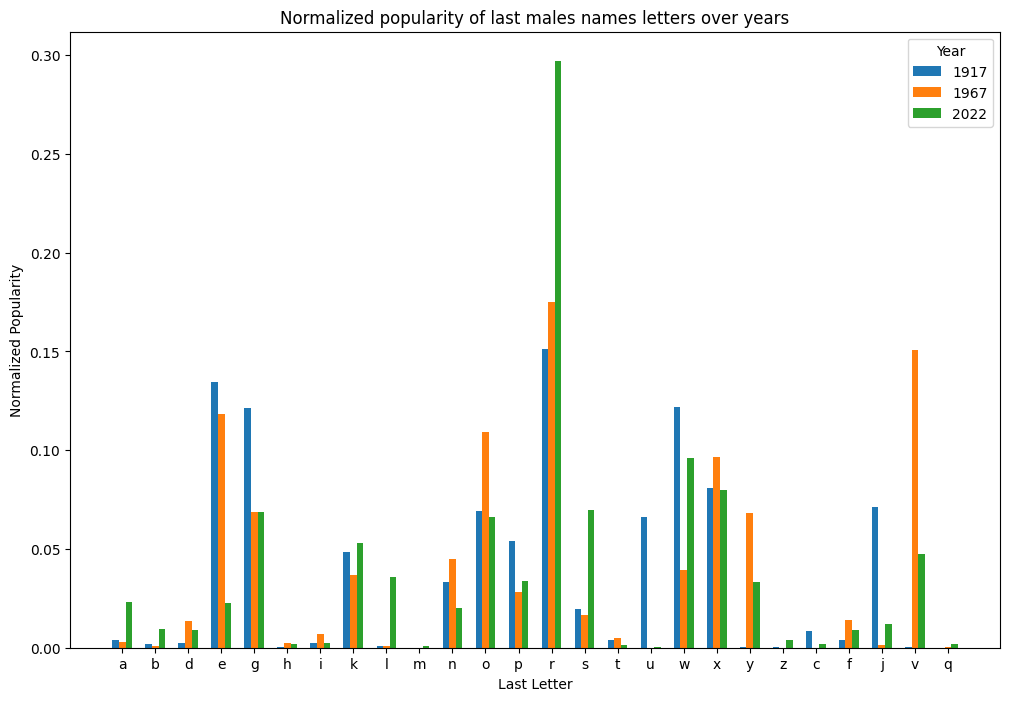

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

# Unikalne litery z kolumny dot. ostatniej litery
letters = selected_years_data['Last_letter'].unique()
# Unikalne lata z kolumny dot. lat
years_plot = selected_years_data['Year'].unique()
num_years = len(years_plot)
bar_width = 0.2

# Bar - plot dla każdego roku (mężczyźni)
for i, year in enumerate(years_plot):
    data_year = selected_years_data[(selected_years_data['Year'] == year) & (selected_years_data['Sex'] == 'M')]
    
    # Pozycjonowanie bar plotów 
    positions = [x + i * bar_width for x in range(len(data_year['Last_letter']))]
    
    ax.bar(positions, data_year['Normalized_popularity'], width=bar_width, label=str(year))


# Pozycjonowanie oznaczeń oś x 
ax.set_xticks([x + (num_years - 1) * bar_width / 2 for x in range(len(letters))])
ax.set_xticklabels(letters)
ax.set_xlabel('Last Letter')
ax.set_ylabel('Normalized Popularity')
ax.set_title('Normalized popularity of last letters of man names over years')

# Add legend
ax.legend(title='Year', loc='upper right')

plt.show()

In [15]:
# Najwiekszy wzrost lub spadek - najwieksza abs(roznica)
data_1917 = selected_years_data[(selected_years_data['Year'] == 1917) & (selected_years_data['Sex'] == 'M')]
data_2022 = selected_years_data[(selected_years_data['Year'] == 2022) & (selected_years_data['Sex'] == 'M')]

merged_data = pd.merge(data_1917, data_2022, on='Last_letter', suffixes=('_1917', '_2022'))

merged_data['Change'] = abs(merged_data['Normalized_popularity_2022'] - merged_data['Normalized_popularity_1917'])

max_change_letter = merged_data.loc[merged_data['Change'].idxmax()]['Last_letter']
max_change_value = merged_data['Change'].max()

print(f"Największy wzrost/spadek dla litery: '{max_change_letter} (wartosc bezwzgledna z roznicy)'")


Największy wzrost/spadek dla litery: 'n'


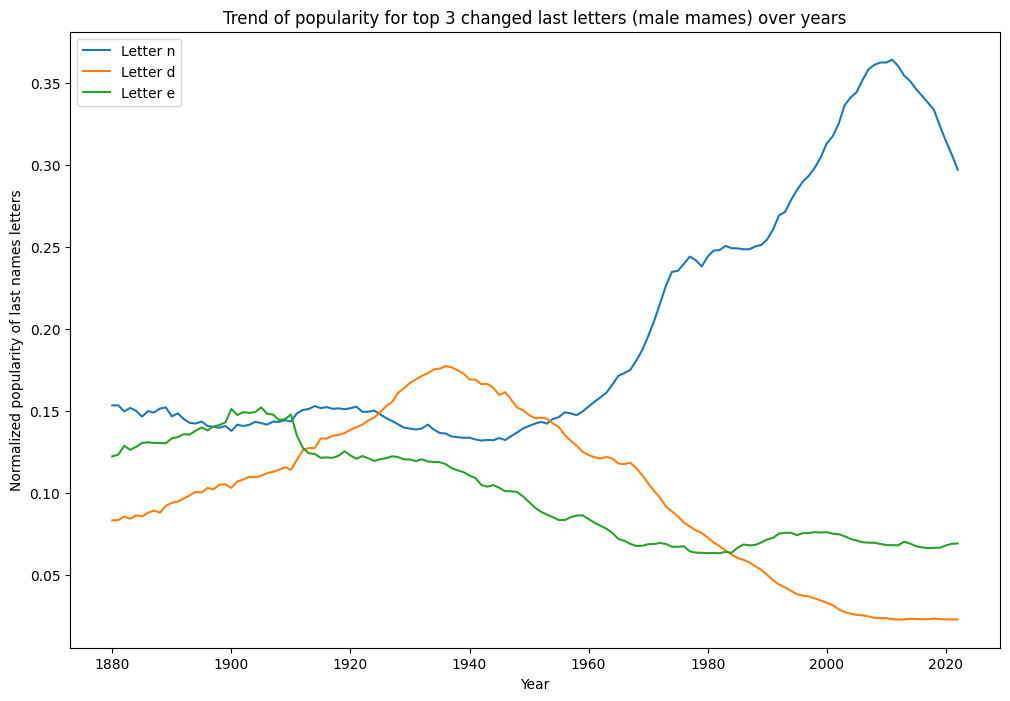

In [36]:
# 3 litery z najwieksza zmiana:
top3_changed_letters = merged_data.nlargest(3, 'Change')['Last_letter'].tolist()

# Calkowita liczba urodzen dla kazdego roku i plci 
letter_popularity['Total_births'] = letter_popularity.groupby(['Year', 'Sex'])['Count'].transform('sum')

# Normalizacja popularności
letter_popularity['Normalized_popularity'] = letter_popularity['Count'] / letter_popularity['Total_births']


data_top3_letters = letter_popularity[letter_popularity['Last_letter'].isin(top3_changed_letters) & (letter_popularity['Sex'] == 'M')]

# Wykres trendu popularności dla każdej z wybranych liter
fig, ax = plt.subplots(figsize=(12, 8))

for letter in top3_changed_letters:
    # data_letter = data_top3_letters[data_top3_letters['Last_letter'] == letter]
    # ax.plot(data_letter['Year'], data_letter['Count'], label=f'Letter {letter}')

    data_letter = letter_popularity[(letter_popularity['Last_letter'] == letter) & (letter_popularity['Sex'] == 'M')]
    ax.plot(data_letter['Year'], data_letter['Normalized_popularity'], label=f'Letter {letter}')

ax.set_xlabel('Year')
ax.set_ylabel('Normalized popularity of last names letters')
ax.set_title('Trend of popularity for top 3 changed last letters (male mames) over years')
ax.legend()
plt.show()

Zadanie 10: Znajdź w rankingu top1000 imiona, które nadawane były zarówno dziewczynkom jak i chłopcom (stosunek nadanych imion męskich i żeńskich). Wyznacz 2 imiona, dla których zaobserwowano największą zmianę (definiowanej jako największa różnica stosunku imion męskich do żeńskich w badanych latach). Do analizy zmiany wykorzystaj 2 przedziały: zagregowane dane do roku 1930 i od roku 2000.
- wyświetl te imiona
- wkreśl przebieg trendu dla tych imion


In [97]:
# Imiona nadawane zarówno dziewczynkom jak i chłopcom w obu przedziałach czasowych razem
common_names = set(top1000_ranking[top1000_ranking['Sex'] == 'M']['Name']).intersection(set(top1000_ranking[top1000_ranking['Sex'] == 'F']['Name']))

# Wyszczegolnianie danych dla wspolncyh imion
common_names_data = all_data[all_data['Name'].isin(common_names)].copy()

# Zagregowane dane do roku 1930
data_before_1930 = common_names_data[common_names_data['Year'] <= 1930]

# Zagregowane dane od roku 2000
data_after_2000 = common_names_data[common_names_data['Year'] >= 2000]

# Grupowanie danych po imionach i płci
grouped_data_before_1930 = data_before_1930.groupby(['Name', 'Sex'])['Count'].sum().unstack(fill_value=0).reset_index()
grouped_data_after_2000 = data_after_2000.groupby(['Name', 'Sex'])['Count'].sum().unstack(fill_value=0).reset_index()

# Stosunek imion męskich do żeńskich z uwzględnieniem zabezpieczenia niedzielenia przez zero tj. zero zastępowane bardzo małą liczbą
grouped_data_before_1930['Ratio'] = grouped_data_before_1930['M'] / (grouped_data_before_1930['F'].replace(0, 1e-10))
grouped_data_after_2000['Ratio'] = grouped_data_after_2000['M'] / (grouped_data_after_2000['F'].replace(0, 1e-10))
# grouped_data_before_1930['Ratio'] = grouped_data_before_1930['M'] / grouped_data_before_1930['F']
# grouped_data_after_2000['Ratio'] = grouped_data_after_2000['M'] / grouped_data_after_2000['F']

# Polaczenie wynikow ratio dla imion dla dat przed 1930 i po 2000
data_before_1930_only_names_and_ratio = grouped_data_before_1930[['Name', 'Ratio']]
data_after_2000_only_names_and_ratio = grouped_data_after_2000[['Name', 'Ratio']]


before1930_after2000_merge_data = pd.merge(data_before_1930_only_names_and_ratio, data_after_2000_only_names_and_ratio, on='Name', suffixes=('_before_1930', '_after_2000'))

# Różnica w stosunkach między latami dla imion
before1930_after2000_merge_data['Ratio_Difference'] = abs(before1930_after2000_merge_data['Ratio_after_2000'] - before1930_after2000_merge_data['Ratio_before_1930'])

# 2 imiona z największą różnicą w ratio między dwoma przedziałami dat 
# Znalezienie dwóch imion z największą różnicą
top_2_diff_ratio_names = before1930_after2000_merge_data.nlargest(2, 'Ratio_Difference')

# Wyświetlenie imion
print("Dwa imiona z największą zmianą w stosunku między przed 1930 a po 2000:")
print(top_2_diff_ratio_names[['Name', 'Ratio_before_1930', 'Ratio_after_2000', 'Ratio_Difference']])

Dwa imiona z największą zmianą w stosunku między przed 1930 a po 2000:
Sex    Name  Ratio_before_1930  Ratio_after_2000  Ratio_Difference
539  Ronald         212.467532      2.252300e+14      2.252300e+14
611  Walter         157.470655      2.251800e+14      2.251800e+14


In [103]:
# Łączymy dane dla dwóch imion z najwieksza zmiana stosunku

selected_names_data_before_1930 = data_before_1930[data_before_1930['Name'].isin(top_2_diff_ratio_names['Name'])].copy()
selected_names_data_after_2000 = data_after_2000[data_after_2000['Name'].isin(top_2_diff_ratio_names['Name'])].copy()

selected_names_data_before_1930['Time Period'] = 'Before 1930'
selected_names_data_after_2000['Time Period'] = 'After 2000'

# Łączenie danych przed 1930 i po 2000
combined_data = pd.concat([selected_names_data_before_1930, selected_names_data_after_2000])
combined_data

,Name,Sex,Count,Year,Total_birth,Frequency_appearance,Total_birth_fm,IsInTop1000,Last_letter,Time Period
25478,Walter,F,92,1926,1185397,0.000078,2295896,True,r,Before 1930
27172,Ronald,F,15,1926,1185397,0.000013,2295896,True,d,Before 1930
30361,Walter,M,11774,1926,1110499,0.010602,2295896,True,r,Before 1930
30432,Ronald,M,2284,1926,1110499,0.002057,2295896,True,d,Before 1930
45900,Walter,F,10,1892,212339,0.000047,334374,True,r,Before 1930
...,...,...,...,...,...,...,...,...,...,...
1834465,Ronald,M,704,2015,1914999,0.000368,3698388,True,d,After 2000
1909441,Walter,M,803,2012,1895816,0.000424,3655713,True,r,After 2000
1909444,Ronald,M,796,2012,1895816,0.000420,3655713,True,d,After 2000
1980882,Ronald,M,889,2011,1898199,0.000468,3656309,True,d,After 2000


In [113]:
# Pobieramy unikalne lata
years = combined_data['Year'].unique()

# Inicjalizujemy pustą listę do przechowywania wyników
ratio_data = []

# Iterujemy po latach
for year in years:
    # Wybieramy dane dla danego roku
    data_year = combined_data[combined_data['Year'] == year]

    # Pobieramy unikalne imiona dla obu płci
    unique_names_male = data_year[data_year['Sex'] == 'M']['Name'].unique()
    unique_names_female = data_year[data_year['Sex'] == 'F']['Name'].unique()

    # Iterujemy tylko po imionach, które występują zarówno wśród mężczyzn, jak i kobiet
    common_names = set(unique_names_male) & set(unique_names_female)
    for name in common_names:
        # Pobieramy ilość dla mężczyzn i kobiet
        count_male = data_year[(data_year['Name'] == name) & (data_year['Sex'] == 'M')]['Count'].values[0] if name in unique_names_male else 0
        count_female = data_year[(data_year['Name'] == name) & (data_year['Sex'] == 'F')]['Count'].values[0] if name in unique_names_female else 0

        # Obliczamy stosunek i dodajemy do listy
        ratio = count_male / (count_female + 1e-10)  # Dodajemy małą wartość, aby uniknąć dzielenia przez zero
        ratio_data.append({'Year': year, 'Name': name, 'Ratio': ratio})

# Tworzymy DataFrame z listy
ratio_df = pd.DataFrame(ratio_data)
ratio_df = ratio_df.sort_values(by='Year')
# Wyświetlamy wyniki
print(ratio_df)



    Year    Name       Ratio
27  1880  Walter  219.375000
38  1881  Walter  151.818182
23  1882  Walter  257.857143
13  1883  Walter  341.000000
25  1884  Walter  271.714286
48  1885  Walter  258.285714
3   1886  Walter  170.909091
31  1888  Walter  408.000000
52  1889  Walter  212.888889
4   1890  Walter  158.750000
43  1891  Walter  166.800000
2   1892  Walter  222.900000
26  1893  Walter  133.600000
40  1894  Walter  118.235294
7   1895  Walter  183.181818
20  1896  Walter  224.111111
24  1897  Walter  111.470588
21  1898  Walter  182.000000
42  1899  Walter  291.500000
12  1900  Walter  208.909091
32  1901  Walter  101.058824
8   1902  Walter  154.833333
44  1903  Walter  141.538462
28  1904  Walter  144.076923
16  1905  Walter  211.333333
41  1906  Walter  161.166667
51  1907  Walter   99.761905
54  1908  Walter  365.333333
49  1909  Walter  152.466667
11  1910  Walter  236.000000
50  1911  Walter  256.166667
45  1912  Walter  148.948718
53  1913  Walter  172.250000
22  1914  Walt

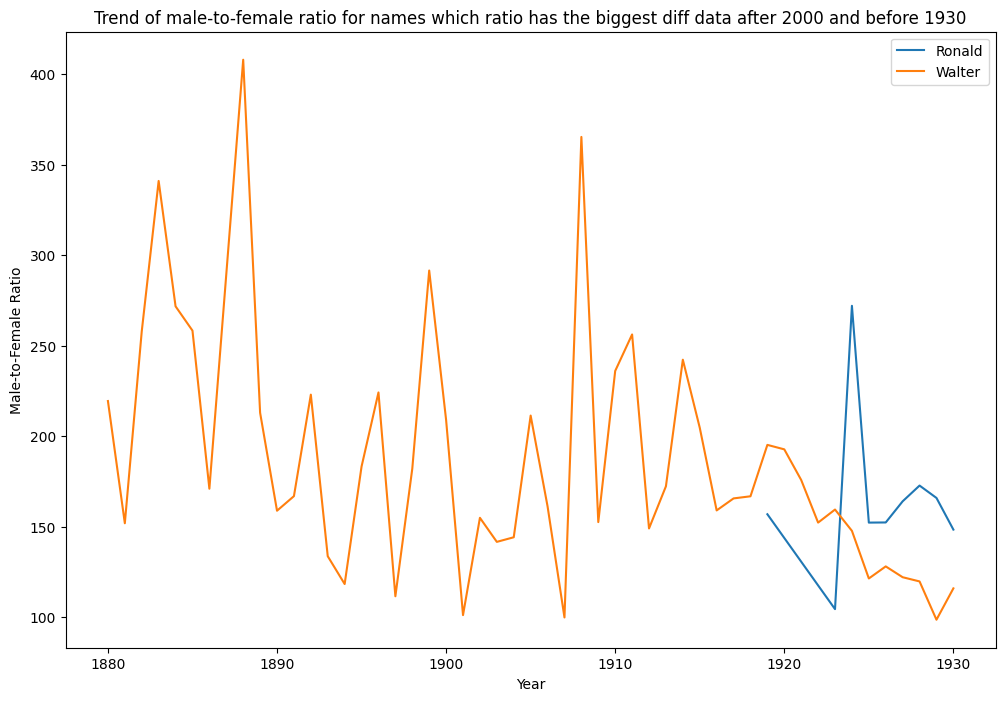

In [114]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through selected names and plot the trend
for name in top_2_diff_ratio_names['Name']:
    data_name = ratio_df[ratio_df['Name'] == name]
    ax.plot(data_name['Year'], data_name['Ratio'], label=name)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('male-to-female ratio')
ax.set_title('Trend of male-to-female ratio for names which ratio has the biggest diff data after 2000 and before 1930')

# Show legend
ax.legend()

# Show the plot
plt.show()
